In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
def select_size(results_df, size):
    return results_df[results_df['model'].str.endswith(size)]

In [51]:
def plot_3a(data, ylim=None):
    ax = sns.lmplot(x='ratio', y='val_accuracy', hue='model', data=data, line_kws={'linewidth': 1.5})
    ax.set(xlim=(0.08, 0.92))
    if ylim is not None:
        ax.set(ylim=ylim)
    return ax

In [134]:
def plot_3a_line(data, ylim=None):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.lineplot(x='ratio', y='val_accuracy', hue='model', data=data, marker='o', ax=ax, linewidth=2.5, markersize=8)
    if ylim is not None:
        ax.set(ylim=ylim)
    return ax

In [4]:
def plot_3b(data, ylim=None):
    ax = sns.lmplot(x='epochs', y='val_accuracy', hue='model', data=data, line_kws={'linewidth': 1.5})
    if ylim is not None:
        ax.set(ylim=ylim)
    return ax

In [137]:
def plot_3b_line(data, ylim=None):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.lineplot(x='epochs', y='val_accuracy', hue='model', data=data, marker='o', ax=ax, linewidth=2.5, markersize=8)
    if ylim is not None:
        ax.set(ylim=ylim)
    return ax

In [146]:
dataset = 'fashion_mnist'
ylim = {
    'mnist': (0.86, 1.0),
    'fashion_mnist': (0.77, 0.91),
}[dataset]

In [132]:
results_3a_svm = pd.read_csv(f'{dataset}/csv/3a_svm.csv')
results_3a_svm = results_3a_svm[1::2]
results_3a_svm = results_3a_svm[results_3a_svm['ratio'] >= 0.1]

results_3a_cnn = pd.read_csv(f'{dataset}/csv/3a_cnn.csv')
results_3a_cnn = results_3a_cnn[results_3a_cnn['ratio'] >= 0.1]

results_3b_cnn = pd.read_csv(f'{dataset}/csv/3b_cnn.csv')

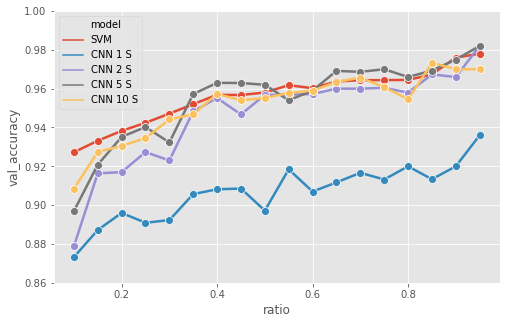

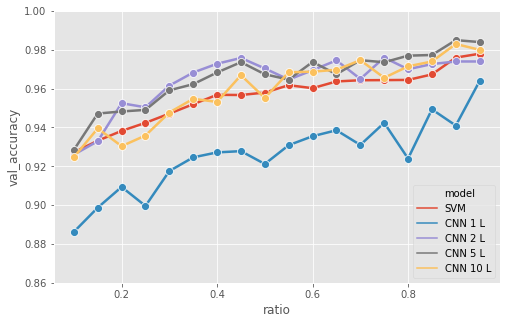

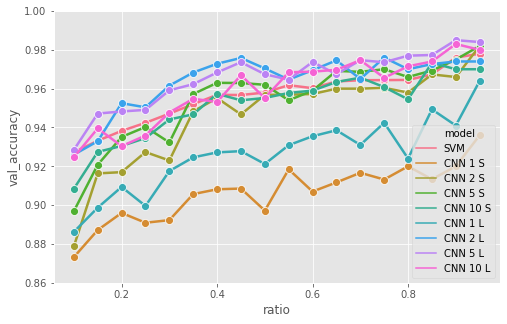

In [144]:
plot_3a_line(pd.concat((
    results_3a_svm,
    select_size(results_3a_cnn, 'S')
)), ylim=ylim).figure.savefig(f'{dataset}/plots/3a/comparision_S.png', dpi=600)

plot_3a_line(pd.concat((
    results_3a_svm,
    select_size(results_3a_cnn, 'L')
)), ylim=ylim).figure.savefig(f'{dataset}/plots/3a/comparision_L.png', dpi=600)

plot_3a_line(pd.concat((
    results_3a_svm,
    results_3a_cnn,
)), ylim=ylim).figure.savefig(f'{dataset}/plots/3a/comparision_all.png', dpi=600)

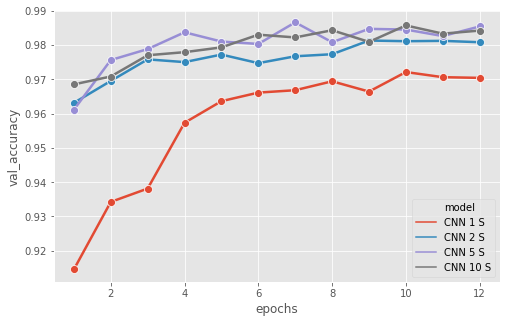

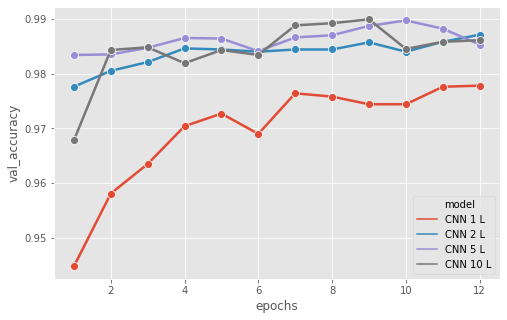

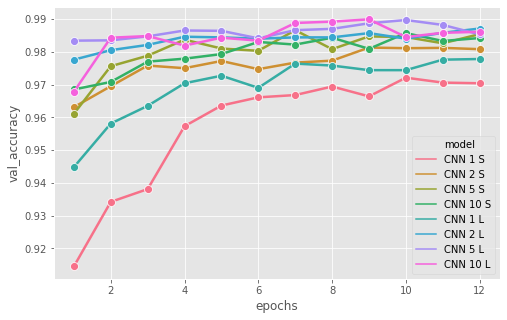

In [147]:
plot_3b_line(
    select_size(results_3b_cnn, 'S')
).figure.savefig(f'{dataset}/plots/3b/comparision_S.png', dpi=600)

plot_3b_line(
    select_size(results_3b_cnn, 'L')
).figure.savefig(f'{dataset}/plots/3b/comparision_L.png', dpi=600)

plot_3b_line(
    results_3b_cnn
).figure.savefig(f'{dataset}/plots/3b/comparision_all.png', dpi=600)